# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [160]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [207]:
# Set up lists to hold reponse info
lat = []
lng = []
temp_max = []
humid = []
cloud = []
wind_spd = []
country = []
date = []
city_num = 0
# Loop through the list of cities and perform a request for data on each
print('Beginning Data Retrieval')
print('-----------------------------')
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind_spd.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_num += 1
        print(f'Information found on city [{city_num}]: {city}')
    except:
        print('City not found. Skipping...')
        lat.append(np.nan)
        lng.append(np.nan)
        temp_max.append(np.nan)
        humid.append(np.nan)
        cloud.append(np.nan)
        wind_spd.append(np.nan)
        country.append(np.nan)
        date.append(np.nan)

Beginning Data Retrieval
-----------------------------
Information found on city [1]: nome
Information found on city [2]: margate
Information found on city [3]: portland
Information found on city [4]: macomb
Information found on city [5]: chuy
Information found on city [6]: hasaki
Information found on city [7]: vicksburg
Information found on city [8]: avarua
City not found. Skipping...
City not found. Skipping...
Information found on city [9]: havelock
Information found on city [10]: wilmington
City not found. Skipping...
Information found on city [11]: santa rosa
Information found on city [12]: ormond beach
Information found on city [13]: lompoc
Information found on city [14]: lamu
Information found on city [15]: punta arenas
Information found on city [16]: kapaa
Information found on city [17]: hermanus
Information found on city [18]: victoria
Information found on city [19]: port alfred
Information found on city [20]: berlevag
City not found. Skipping...
Information found on city [21]

Information found on city [186]: yerbogachen
Information found on city [187]: jungapeo
Information found on city [188]: hami
Information found on city [189]: ballina
Information found on city [190]: luderitz
Information found on city [191]: acarau
Information found on city [192]: okitipupa
Information found on city [193]: slave lake
Information found on city [194]: iqaluit
Information found on city [195]: jalu
Information found on city [196]: tambovka
Information found on city [197]: port shepstone
Information found on city [198]: tasiilaq
Information found on city [199]: port lincoln
Information found on city [200]: megion
Information found on city [201]: qinzhou
Information found on city [202]: hambantota
Information found on city [203]: flinders
Information found on city [204]: khatanga
City not found. Skipping...
Information found on city [205]: tiksi
Information found on city [206]: ilulissat
Information found on city [207]: rio gallegos
Information found on city [208]: cayenne
In

Information found on city [369]: gemena
Information found on city [370]: yeppoon
Information found on city [371]: coihaique
Information found on city [372]: langfang
City not found. Skipping...
Information found on city [373]: nieves
Information found on city [374]: axim
Information found on city [375]: sistranda
Information found on city [376]: methoni
Information found on city [377]: kalmunai
Information found on city [378]: balabac
Information found on city [379]: alugan
Information found on city [380]: sao borja
Information found on city [381]: ajdabiya
Information found on city [382]: midland
Information found on city [383]: tongren
Information found on city [384]: kyrnasivka
Information found on city [385]: blora
Information found on city [386]: sola
Information found on city [387]: chimoio
Information found on city [388]: tigil
Information found on city [389]: tocopilla
Information found on city [390]: eyl
Information found on city [391]: yongan
Information found on city [392]: 

Information found on city [553]: aitape
Information found on city [554]: broome
Information found on city [555]: tafresh
Information found on city [556]: bandarban


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [234]:
weather_dict = {'City': cities,
                       'Lat': lat,
                       'Lng': lng,
                       'Max Temp': temp_max,
                       'Humidity': humid,
                       'Cloudiness': cloud,
                       'Wind Speed': wind_spd,
                       'Country': country,
                       'Date': date
                      }
weather_data = pd.DataFrame(weather_dict).dropna()
weather_data.to_csv(r'C:\Users\Clay\Desktop\RICE\python-api-challenge\starter_code\weather_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [209]:
weather_humid = weather_data[weather_data.Humidity > 100]
weather_humid

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [210]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

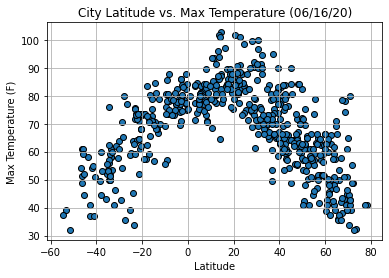

This code is analyzing temperature as it relates to our city locations on Earths Longitudinal lines.
We can observe that the closer the city is to the equator (Lat 0), the higher the temperature is.


In [211]:
x_values = weather_data['Lat']
y_values = weather_data['Max Temp']
plt.scatter(x_values,y_values, edgecolors='black')
plt.title('City Latitude vs. Max Temperature (06/16/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(b=True, which='major', axis='both', linestyle='-')
plt.savefig(r'C:\Users\Clay\Desktop\RICE\python-api-challenge\starter_code\plot1.png')
plt.show()
print('This code is analyzing temperature as it relates to our city locations on Earths Longitudinal lines.')
print('We can observe that the closer the city is to the equator (Lat 0), the higher the temperature is.')

## Latitude vs. Humidity Plot

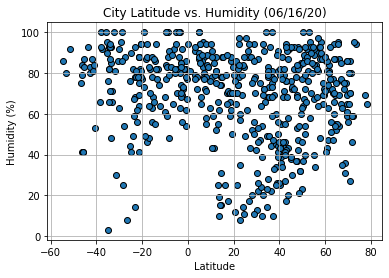

This code is analyzing humidy as it relates to our city locations on Earths Longitudinal lines.


In [212]:
x_values = weather_data['Lat']
y_values = weather_data['Humidity']
plt.scatter(x_values,y_values, edgecolors='black')
plt.title('City Latitude vs. Humidity (06/16/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(b=True, which='major', axis='both', linestyle='-')
plt.savefig(r'C:\Users\Clay\Desktop\RICE\python-api-challenge\starter_code\plot2.png')
plt.show()
print('This code is analyzing humidy as it relates to our city locations on Earths Longitudinal lines.')

## Latitude vs. Cloudiness Plot

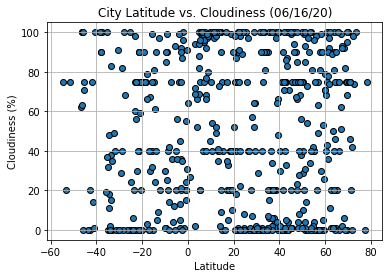

This code is analyzing cloudiness as it relates to our city locations on Earths Longitudinal lines.


In [213]:
x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']
plt.scatter(x_values,y_values, edgecolors='black')
plt.title('City Latitude vs. Cloudiness (06/16/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(b=True, which='major', axis='both', linestyle='-')
plt.savefig(r'C:\Users\Clay\Desktop\RICE\python-api-challenge\starter_code\plot3.png')
plt.show()
print('This code is analyzing cloudiness as it relates to our city locations on Earths Longitudinal lines.')

## Latitude vs. Wind Speed Plot

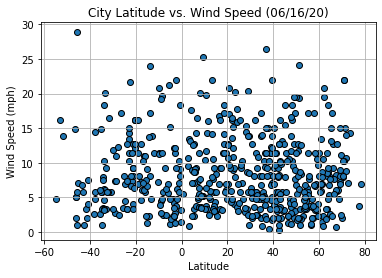

This code is analyzing wind speed as it relates to our city locations on Earths Longitudinal lines.


In [187]:
x_values = weather_data['Lat']
y_values = weather_data['Wind Speed']
plt.scatter(x_values,y_values, edgecolors='black')
plt.title('City Latitude vs. Wind Speed (06/16/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(b=True, which='major', axis='both', linestyle='-')
plt.savefig(r'C:\Users\Clay\Desktop\RICE\python-api-challenge\starter_code\plot4.png')
plt.show()
print('This code is analyzing wind speed as it relates to our city locations on Earths Longitudinal lines.')

## Linear Regression

In [171]:
# OPTIONAL: Create a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

In [172]:
# Create Northern and Southern Hemisphere DataFrames
north_data = weather_data[weather_data.Lat >= 0]
south_data = weather_data[weather_data.Lat < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.593287231649514


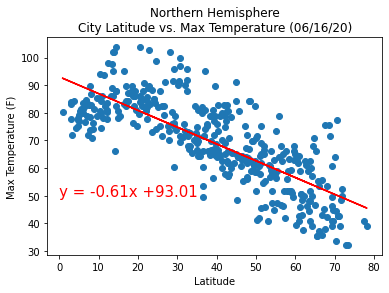

We observe that Temperature decreases as Latitute increases, a very strong
linear relationship


In [216]:
x_values = north_data['Lat']
y_values = north_data['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Northern Hemisphere\nCity Latitude vs. Max Temperature (06/16/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.savefig(r'C:\Users\Clay\Desktop\RICE\python-api-challenge\starter_code\plot5.png')
plt.show()
print('We observe that Temperature decreases as Latitute increases, a very strong\nlinear relationship')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6164416378369199


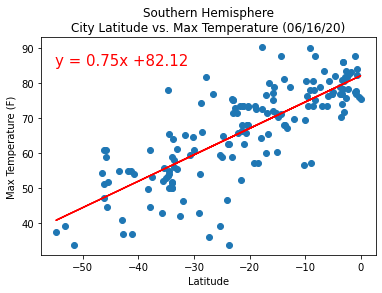

We observe that Temperature increases as Latitute increases, a very strong
linear relationship
After observing the Northern and Southern hemispheres independantly, we can
infer that the close to Latitude 0 your are, the higher the Temperature will
be.


In [219]:
x_values = south_data['Lat']
y_values = south_data['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Southern Hemisphere\nCity Latitude vs. Max Temperature (06/16/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq,(-55,85),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.savefig(r'C:\Users\Clay\Desktop\RICE\python-api-challenge\starter_code\plot6.png')
plt.show()
print('We observe that Temperature increases as Latitute increases, a very strong\nlinear relationship')
print('After observing the Northern and Southern hemispheres independantly, we can\ninfer that the close to Latitude 0 your are, the higher the Temperature will\nbe.')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0001396882109620506


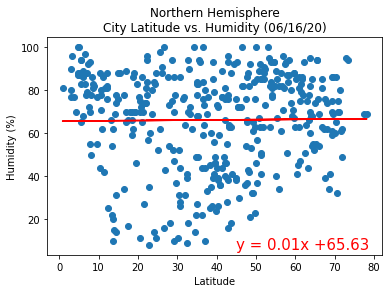

Our regression line is nearly flat, telling us there is not a strong
relationship between Humidity and Latitude.


In [223]:
x_values = north_data['Lat']
y_values = north_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Northern Hemisphere\nCity Latitude vs. Humidity (06/16/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(45,6),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.savefig(r'C:\Users\Clay\Desktop\RICE\python-api-challenge\starter_code\plot7.png')
plt.show()
print('Our regression line is nearly flat, telling us there is not a strong\nrelationship between Humidity and Latitude.')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008902672007076983


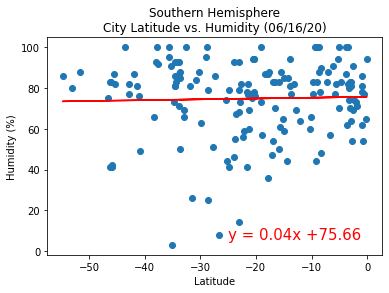

Our regression line is nearly flat, telling us there is not a strong
relationship between Humidity and Latitude.
Longitude may give more telling information about Humidity vs. Location.


In [225]:
x_values = south_data['Lat']
y_values = south_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Southern Hemisphere\nCity Latitude vs. Humidity (06/16/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(-25,6),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.savefig(r'C:\Users\Clay\Desktop\RICE\python-api-challenge\starter_code\plot8.png')
plt.show()
print('Our regression line is nearly flat, telling us there is not a strong\nrelationship between Humidity and Latitude.')
print('Longitude may give more telling information about Humidity vs. Location.')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.004563111479877657


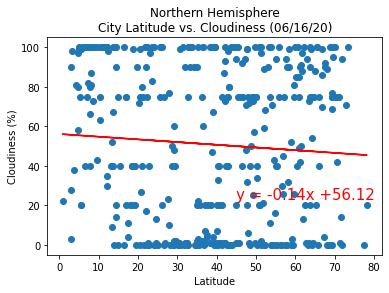

Regression model tells us there is a weak relationship between cloudiness
and latitude. You could infer that it is slightly less cloudy as you progress
from 0 to 80 latitude.


In [227]:
x_values = north_data['Lat']
y_values = north_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Northern Hemisphere\nCity Latitude vs. Cloudiness (06/16/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(45,23),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.savefig(r'C:\Users\Clay\Desktop\RICE\python-api-challenge\starter_code\plot9.png')
plt.show()
print('Regression model tells us there is a weak relationship between cloudiness\nand latitude. You could infer that it is slightly less cloudy as you progress\nfrom 0 to 80 latitude.')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 3.217814507428033e-05


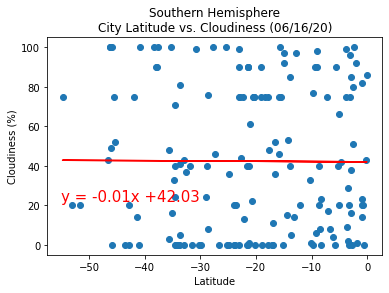

Regression model tells us there is a weak relationship between cloudiness
and latitude.


In [230]:
x_values = south_data['Lat']
y_values = south_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Southern Hemisphere\nCity Latitude vs. Cloudiness (06/16/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(-55,22),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.savefig(r'C:\Users\Clay\Desktop\RICE\python-api-challenge\starter_code\plot10.png')
plt.show()
print('Regression model tells us there is a weak relationship between cloudiness\nand latitude.')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.003942620358663375


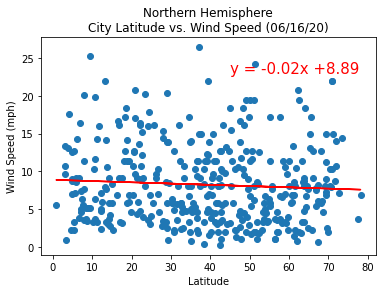

Our regression analysis tells us the there can be a high variance in wind speed
regaurdless of latitudinal location.


In [233]:
x_values = north_data['Lat']
y_values = north_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Northern Hemisphere\nCity Latitude vs. Wind Speed (06/16/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(45,23),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.savefig(r'C:\Users\Clay\Desktop\RICE\python-api-challenge\starter_code\plot11.png')
plt.show()
print('Our regression analysis tells us the there can be a high variance in wind speed\nregaurdless of latitudinal location.')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 1.3846822421881805e-05


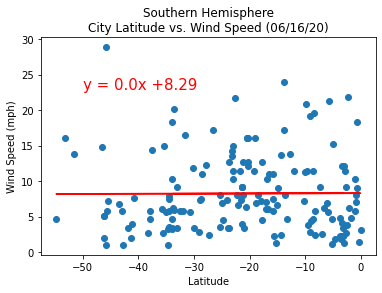

Our regression analysis tells us the there can be a high variance in wind speed
regaurdless of latitudinal location.


In [232]:
x_values = south_data['Lat']
y_values = south_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Southern Hemisphere\nCity Latitude vs. Wind Speed (06/16/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(-50,23),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.savefig(r'C:\Users\Clay\Desktop\RICE\python-api-challenge\starter_code\plot12.png')
plt.show()
print('Our regression analysis tells us the there can be a high variance in wind speed\nregaurdless of latitudinal location.')

In [ ]:
# Extra code I didn't use. Didn't want to scrap completely so storing here at bottom.

In [ ]:
# weather_dictxxx = {'City': cities}
# weather_dictxxx_df = pd.DataFrame(weather_dictxxx)
# weather_dictxxx_df['Lat'] = ""
# weather_dictxxx_df['Lng'] = ""
# weather_dictxxx_df['Max Temp'] = ""
# weather_dictxxx_df['Humidity'] = ""
# weather_dictxxx_df['Cloudiness'] = ""
# weather_dictxxx_df['Wind Speed'] = ""
# weather_dictxxx_df['Country'] = ""
# weather_dictxxx_df['Date'] = ""
# weather_dictxxx_df.head(3)

In [ ]:
# base_url = "http://api.openweathermap.org/data/2.5/weather?"
# params = {
#     "key": weather_api_key,
#     "units": units}
# for index, row in weather_dictxxx_df.iterrows():
#     city_x = row['City']
#     params['keyword'] = city_x
#     print(f"Retrieving Results for Index {index}: {city_x}.")
#     response = requests.get(base_url, params=params).json()
#     results = response['results']
#     try:
#         weather_dictxxx_df.loc[index, 'Lat'] = results['coord']['lat']
#         weather_dictxxx_df.loc[index, 'Lng'] = results['coord']['lon']
#         weather_dictxxx_df.loc[index, 'Max Temp'] = results['main']['temp_max']
#         weather_dictxxx_df.loc[index, 'Humidity'] = results['main']['humidity']
#         weather_dictxxx_df.loc[index, 'Cloudiness'] = results['clouds']['all']
#         weather_dictxxx_df.loc[index, 'Wind Speed'] = results['wind']['speed']
#         weather_dictxxx_df.loc[index, 'Country'] = results['sys']['country']
#         weather_dictxxx_df.loc[index, 'Date'] = results['dt']
#     except (KeyError, IndexError):
#         print('City not found. Skipping...')